### How to break into the field

I am also interested to know how those respondents learn to enter or plan to enter this field  and which programming languages they are using. Now let's analyse those questions.

In [19]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")


In [20]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [21]:
#Now to look at our second question of interest: How do those employed in the industry 
#educate and self educate and what languages they used on the workplace. Let's have a look
#at the 3 columns "EducationTypes,SelfTaughtTypes,HaveWorkedLanguage"

In [22]:
#First EducationTypes
df_education = df['EducationTypes'].value_counts().reset_index()
df_education.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [23]:
#Then let us compare with SelfTaughtTypes
df_selftaught = df['SelfTaughtTypes'].value_counts().reset_index()
df_selftaught.head()

,index,SelfTaughtTypes
0,Official documentation; Trade book; Stack Over...,1001
1,Official documentation; Stack Overflow Q&A,956
2,Official documentation; Stack Overflow Q&A; No...,848
3,Official documentation; Stack Overflow Q&A; Bu...,796
4,Official documentation; Trade book; Stack Over...,781


In [24]:
# They are grouping items together if a participant provided 
# more than just one answer.  Let's see clean this up.
# first to change this index column to a more appropriate name
df_education.rename(columns={'index': 'EducationTypes', 'EducationTypes': 'count'}, inplace=True)
df_selftaught.rename(columns={'index': 'SelfTaughtTypes', 'SelfTaughtTypes': 'count'}, inplace=True)
df_education.head()

,EducationTypes,count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [25]:
# Built a function that help get the count of each mentioned types within column
def type_list(df,column):
    """
    Function that help get the count of each mentioned types within column

    Input: dataframe name and the column name 
    Output: return a dataframe with all the mentioned types and their count
    """
    df_new=df[column].str.split(";", expand = True)
    type_list=[]
    for i in range(df_new.shape[1]):
        df_new[i]=df_new[i].str.strip()
        j=df_new[i].tolist()
        type_list.append(j)
        list_flat = list(itertools.chain(*type_list))
        df_type = pd.Series(Counter(list_flat)).sort_index().rename_axis('type').reset_index(name='count')        
    return df_type
        


In [26]:
#First let us look at the type count of EducationTypes to see how those respondents learn 
#those techincal skills
education_list=type_list(df,'EducationTypes')
education_list=education_list.groupby('type').sum().reset_index().sort_values(by='count',ascending=False)
education_list

,type,count
8,Self-taught,27330
5,Online course,13792
4,On-the-job training,12508
6,Open source contributions,11225
2,Hackathon,7150
1,Coding competition,6683
7,Part-time/evening course,4654
3,Industry certification,4472
0,Bootcamp,2727


In [32]:
# We might also look at the percent
education_list['perc'] = education_list['count']/np.sum(education_list['count'])
education_list.sort_values(by='perc',ascending=False)

,type,count,perc
8,Self-taught,27330,0.301852
5,Online course,13792,0.152329
4,On-the-job training,12508,0.138147
6,Open source contributions,11225,0.123977
2,Hackathon,7150,0.078970
1,Coding competition,6683,0.073812
7,Part-time/evening course,4654,0.051402
3,Industry certification,4472,0.049392
0,Bootcamp,2727,0.030119


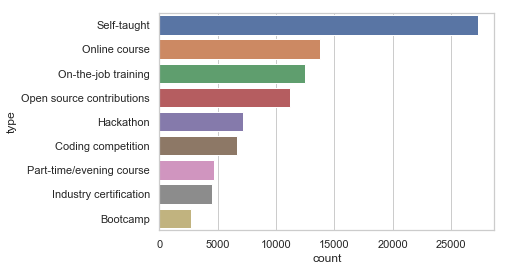

In [31]:
ax = sns.barplot(x="count", y="type", data=education_list)

In [15]:
#Its seems that most of them are through self taught with 30%, then followed by online and 
#on the job trainings

In [33]:
#Second let us look at the type count of SelfTaughtTypes to see through what sources that those respondents learn 
#those techincal skills
selftaught_list=type_list(df,'SelfTaughtTypes')
selftaught_list=selftaught_list.groupby('type').sum().reset_index().sort_values(by='count',ascending=False)
selftaught_list['perc'] = selftaught_list['count']/np.sum(selftaught_list['count'])
selftaught_list.sort_values(by='perc',ascending=False)
selftaught_list

,type,count,perc
4,Official documentation,21434,0.193019
7,Stack Overflow Q&A,21409,0.192794
9,Trade book,14389,0.129577
3,Non-Stack online communities,13546,0.121985
0,Built-in help,12585,0.113331
6,Stack Overflow Docs,7348,0.066171
8,Textbook,5558,0.050051
2,Friends network,5537,0.049862
1,Company internal community,4947,0.044549
5,Other,3129,0.028178


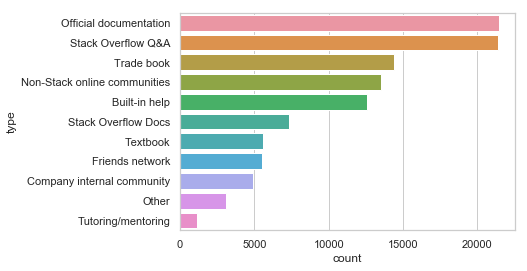

In [39]:
ax = sns.barplot(x="count", y="type", data=selftaught_list)

In [ ]:
#around 20% of respondents learned through official documentation and stack overflow Q&A, which
#outweight other methods

In [35]:
#Third let us look at what programming languges they knew
lan_list=type_list(df,'HaveWorkedLanguage')
lan_list=lan_list.groupby('type').sum().reset_index().sort_values(by='count',ascending=False)
lan_list['perc'] = lan_list['count']/np.sum(lan_list['count'])
lan_list.sort_values(by='perc',ascending=False)
lan_list.head(15)

,type,count,perc
16,JavaScript,22875,0.164967
27,SQL,18754,0.135248
15,Java,14524,0.104742
2,C#,12476,0.089973
23,Python,11704,0.084405
21,PHP,10290,0.074208
3,C++,8155,0.058811
1,C,6974,0.050294
31,TypeScript,3488,0.025154
25,Ruby,3324,0.023972


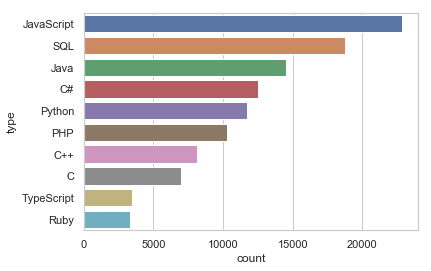

In [37]:
ax = sns.barplot(x="count", y="type", data=lan_list.head(10))

In [ ]:
#Top 5 most used lanagues are JS, SQL, Jave, C# and Python